In [5]:
from typing import Any
import itertools

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators

Testing 1/4: deadend_start=False, deadend_end=False:   0%|          | 0/100 [00:00<?, ?it/s]

Testing 1/4: deadend_start=False, deadend_end=False: 100%|██████████| 100/100 [01:50<00:00,  1.10s/it]
Testing 2/4: deadend_start=True, deadend_end=False: 100%|██████████| 100/100 [02:44<00:00,  1.65s/it]
Testing 3/4: deadend_start=False, deadend_end=True: 100%|██████████| 100/100 [02:47<00:00,  1.67s/it]
Testing 4/4: deadend_start=True, deadend_end=True: 100%|██████████| 100/100 [03:26<00:00,  2.07s/it]


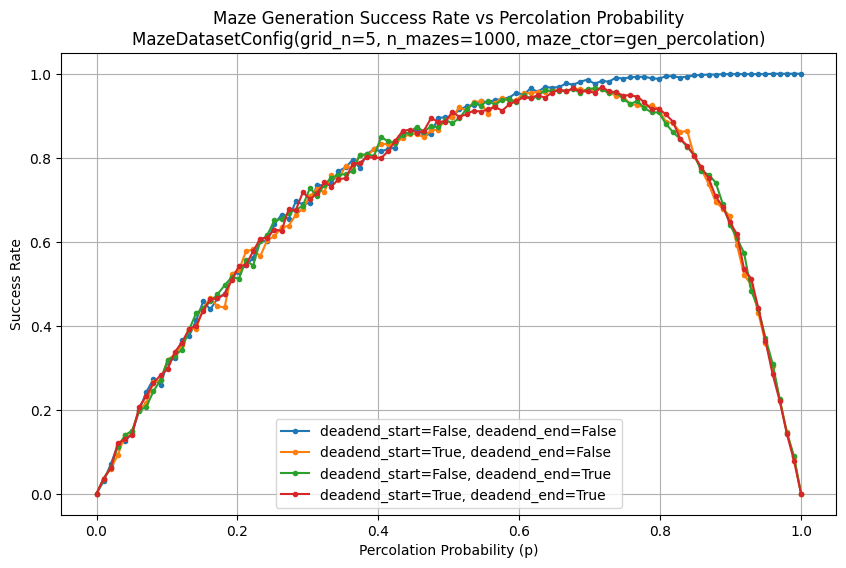

In [4]:


def analyze_percolation_success(
    cfg_kwargs: dict,
    p_values: np.ndarray,
    endpoint_configs: list[tuple[str, dict]] = None,
) -> dict[str, Any]:
    """Analyze success rate of maze generation for different percolation values and endpoint constraints
    
    # Parameters:
     - `cfg_kwargs : dict`   
       Keyword arguments for MazeDatasetConfig. must contain `n_mazes`, `grid_n`, and `maze_ctor`
     - `p_values : np.ndarray`   
       numpy array of percolation probability values to test
     - `endpoint_configs : list[tuple[str, dict]]`   
       List of (name, endpoint configuration dict) tuples to test
       (defaults to `None`)
    
    # Returns:
    `dict[str, Any]` with the following:
    - `"configs": list[MazeDatasetConfig]`
       List of MazeDatasetConfig objects used for testing
    - `"p_values": np.ndarray`
    - `"results": dict[str, np.ndarray]` 
       Dictionary mapping endpoint config names to arrays of success rates
    """    

    assert "n_mazes" in cfg_kwargs, "cfg_kwargs must contain 'n_mazes'"
    assert "grid_n" in cfg_kwargs, "cfg_kwargs must contain 'grid_n'"
    assert "maze_ctor" in cfg_kwargs, "cfg_kwargs must contain 'maze_ctor'"

    n_mazes: int = cfg_kwargs["n_mazes"]

    if endpoint_configs is None:
        endpoint_configs = [
            ("no_deadend", dict(deadend_start=False, deadend_end=False)),
            ("no_deadend_unique", dict(deadend_start=False, deadend_end=False, endpoints_not_equal=True)),
            ("deadends", dict(deadend_start=True, deadend_end=True)),
            ("deadends_unique", dict(deadend_start=True, deadend_end=True, endpoints_not_equal=True)),
        ]
    n_endpoint_configs: int = len(endpoint_configs)
    
    configs: list[MazeDatasetConfig] = []
    success_rates: dict[str, np.ndarray] = {}

    for idx_cfg, (ep_cfg_name, ep_cfg) in enumerate(endpoint_configs):
        rates: list[float] = []

        for p in tqdm(p_values, desc=f"Testing {idx_cfg+1}/{n_endpoint_configs}: {ep_cfg_name}", total=len(p_values)):
            cfg: MazeDatasetConfig = MazeDatasetConfig(
                name="percolation_test",
                **cfg_kwargs,
                maze_ctor_kwargs={"p": float(p)},
                endpoint_kwargs={
                    **ep_cfg,
                    "except_on_no_valid_endpoint": False
                }
            )
            configs.append(cfg)

            dataset: MazeDataset = MazeDataset.from_config(
                cfg,
                do_download=False,
                load_local=False,
                save_local=False,
                verbose=False,
            )

            rates.append(len(dataset) / n_mazes)

        success_rates[ep_cfg_name] = np.array(rates)

    return dict(configs=configs, p_values=p_values, success_rates=success_rates)


def plot_percolation_results(
    results: dict[str, Any],
    save_path: str = None,
) -> None:
    """Plot the results of percolation analysis.
    
    # Parameters:
     - `results : dict[str, Any]`   
       results dict from `analyze_percolation_success`
     - `save_path : str`   
       Path to save the plot to, will display if `None`
       (defaults to `None`)
    """
    fig: plt.Figure; ax: plt.Axes
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    for ep_cfg_name, success_rates in results["success_rates"].items():
        ax.plot(results["p_values"], success_rates, ".-", label=ep_cfg_name)

    ax.set_xlabel("Percolation Probability (p)")
    ax.set_ylabel("Success Rate")
    cfg: MazeDatasetConfig = results["configs"][0]
    ax.set_title(f"Maze Generation Success Rate vs Percolation Probability\nMazeDatasetConfig(grid_n={cfg.grid_n}, n_mazes={cfg.n_mazes}, maze_ctor={cfg.maze_ctor.__name__})")
    ax.grid(True)
    ax.legend()

    if save_path:
        plt.savefig(save_path)
    plt.show()


# Run the analysis
results: dict[str, Any] = analyze_percolation_success(
    cfg_kwargs=dict(
        grid_n=5,
        n_mazes=1000,
        maze_ctor=LatticeMazeGenerators.gen_percolation,
    ),
    p_values=np.linspace(0.0, 1.0, 100),
)

# Plot results
plot_percolation_results(results)



# Analyzing grid_n=4, gen_func=gen_percolation




Testing 1/4: deadend_start=False, deadend_end=False: 100%|██████████| 50/50 [00:04<00:00, 10.90it/s]
Testing 2/4: deadend_start=True, deadend_end=False: 100%|██████████| 50/50 [00:05<00:00,  8.56it/s]
Testing 3/4: deadend_start=False, deadend_end=True: 100%|██████████| 50/50 [00:05<00:00,  9.02it/s]
Testing 4/4: deadend_start=True, deadend_end=True: 100%|██████████| 50/50 [00:06<00:00,  7.33it/s]


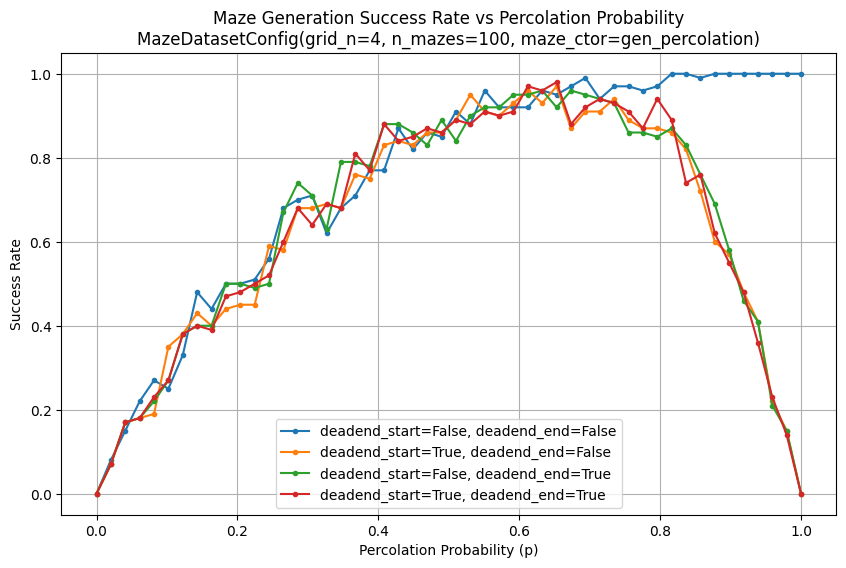



# Analyzing grid_n=4, gen_func=gen_dfs_percolation




Testing 1/4: deadend_start=False, deadend_end=False: 100%|██████████| 50/50 [00:09<00:00,  5.52it/s]
Testing 2/4: deadend_start=True, deadend_end=False: 100%|██████████| 50/50 [00:12<00:00,  4.13it/s]
Testing 3/4: deadend_start=False, deadend_end=True: 100%|██████████| 50/50 [00:12<00:00,  3.91it/s]
Testing 4/4: deadend_start=True, deadend_end=True: 100%|██████████| 50/50 [00:17<00:00,  2.83it/s]


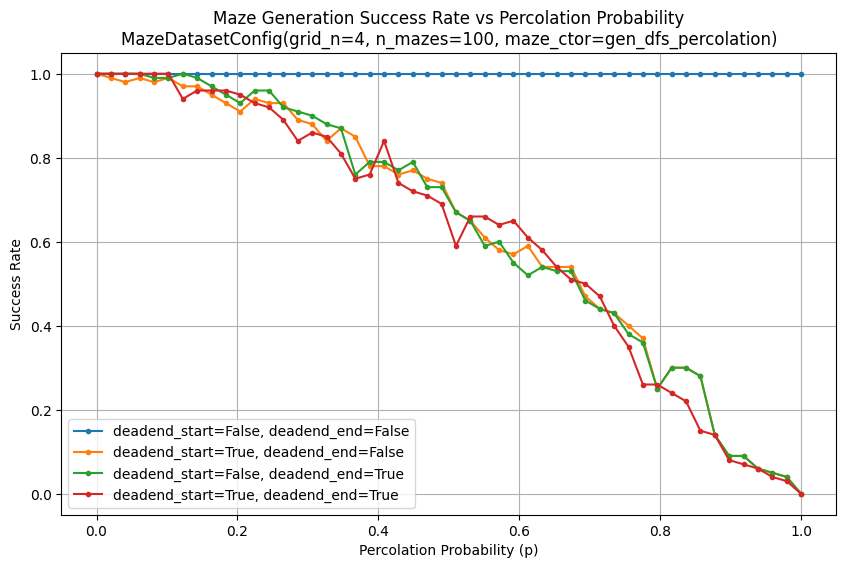



# Analyzing grid_n=16, gen_func=gen_percolation




Testing 1/4: deadend_start=False, deadend_end=False: 100%|██████████| 50/50 [00:49<00:00,  1.01it/s]
Testing 2/4: deadend_start=True, deadend_end=False: 100%|██████████| 50/50 [01:14<00:00,  1.50s/it]
Testing 3/4: deadend_start=False, deadend_end=True: 100%|██████████| 50/50 [01:15<00:00,  1.51s/it]
Testing 4/4: deadend_start=True, deadend_end=True: 100%|██████████| 50/50 [01:38<00:00,  1.96s/it]


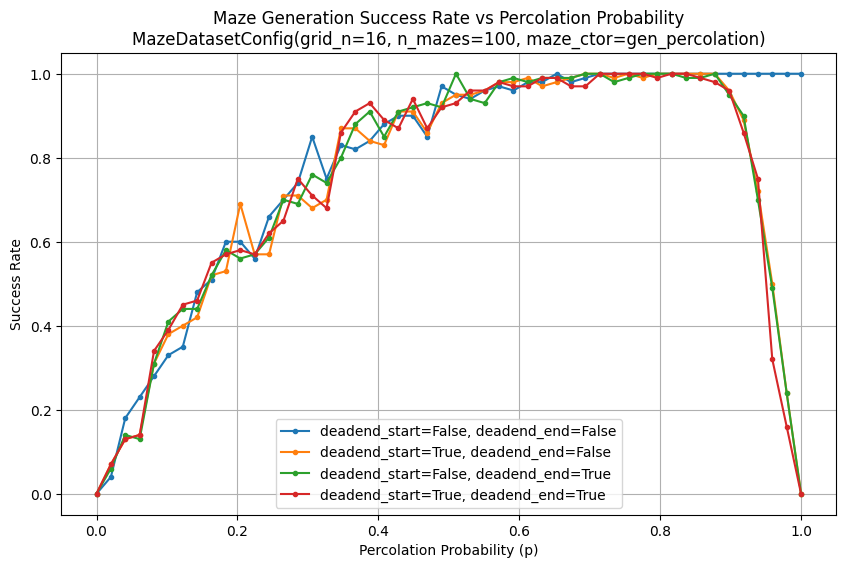



# Analyzing grid_n=16, gen_func=gen_dfs_percolation




Testing 1/4: deadend_start=False, deadend_end=False: 100%|██████████| 50/50 [02:07<00:00,  2.55s/it]
Testing 2/4: deadend_start=True, deadend_end=False: 100%|██████████| 50/50 [03:01<00:00,  3.64s/it]
Testing 3/4: deadend_start=False, deadend_end=True: 100%|██████████| 50/50 [03:04<00:00,  3.69s/it]
Testing 4/4: deadend_start=True, deadend_end=True: 100%|██████████| 50/50 [03:55<00:00,  4.72s/it]


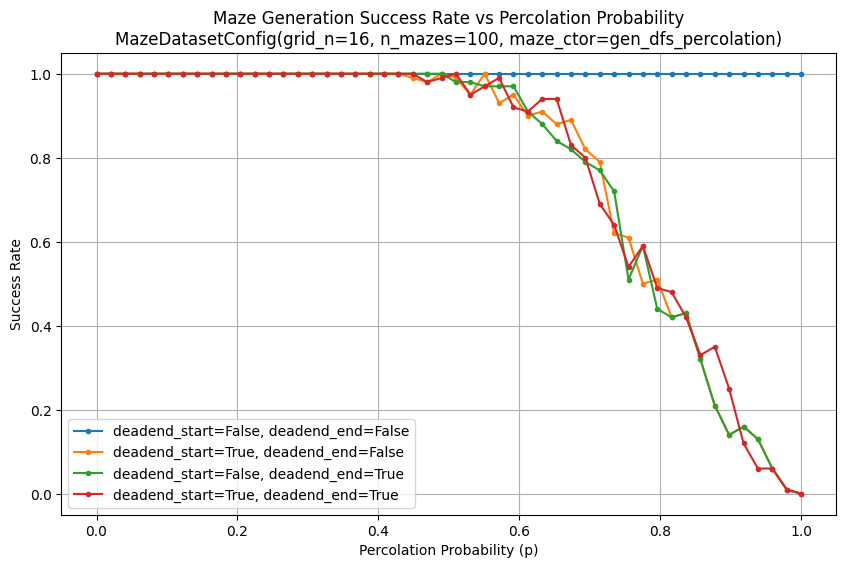



# Analyzing grid_n=32, gen_func=gen_percolation




Testing 1/4: deadend_start=False, deadend_end=False: 100%|██████████| 50/50 [03:02<00:00,  3.66s/it]
Testing 2/4: deadend_start=True, deadend_end=False: 100%|██████████| 50/50 [04:45<00:00,  5.72s/it]
Testing 3/4: deadend_start=False, deadend_end=True: 100%|██████████| 50/50 [04:50<00:00,  5.80s/it]
Testing 4/4: deadend_start=True, deadend_end=True: 100%|██████████| 50/50 [06:28<00:00,  7.77s/it]


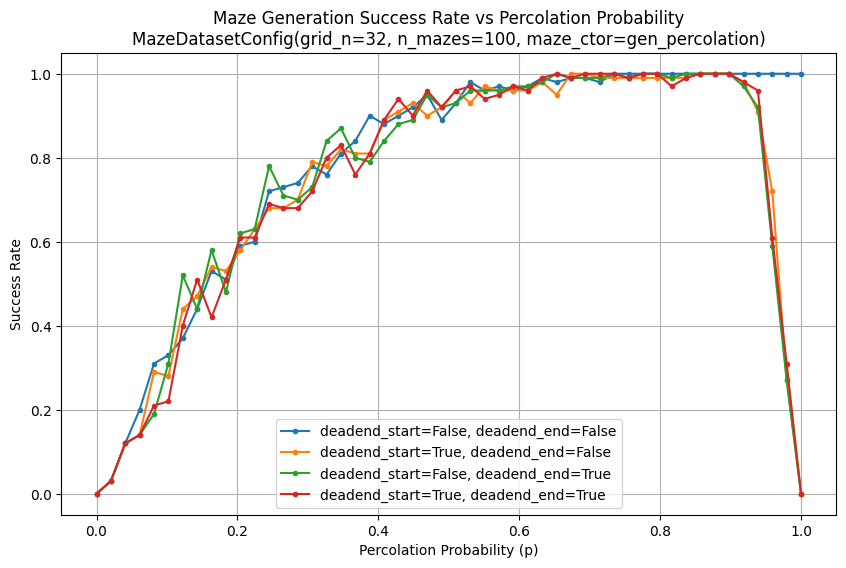



# Analyzing grid_n=32, gen_func=gen_dfs_percolation




Testing 1/4: deadend_start=False, deadend_end=False: 100%|██████████| 50/50 [08:30<00:00, 10.20s/it]
Testing 2/4: deadend_start=True, deadend_end=False: 100%|██████████| 50/50 [12:20<00:00, 14.81s/it]
Testing 3/4: deadend_start=False, deadend_end=True: 100%|██████████| 50/50 [12:29<00:00, 14.99s/it]
Testing 4/4: deadend_start=True, deadend_end=True:  48%|████▊     | 24/50 [08:32<09:15, 21.37s/it]


KeyboardInterrupt: 

In [12]:
for i, (grid_n, gen_func) in enumerate(itertools.product(
	[4, 16, 32, 64],
	[LatticeMazeGenerators.gen_percolation, LatticeMazeGenerators.gen_dfs_percolation],
)):
	print(f"\n\n# Analyzing grid_n={grid_n}, gen_func={gen_func.__name__}\n\n")
	plot_percolation_results(
		analyze_percolation_success(
			cfg_kwargs=dict(
				grid_n=grid_n,
				n_mazes=100,
				maze_ctor=gen_func,
			),
			p_values=np.linspace(0.0, 1.0, 50),
		),
		save_path=f"../docs/benchmarks/percolation_fractions/g{grid_n}-a_{gen_func.__name__}.svg",
	)